 # Data Visualization and Pandas Bootcamp
 By: Adrian Garcia<br>
 UCSC: AM-170B

## Data Structures

- A container for holding several data objects. Data structures allow you to handle large amounts of data and keep everything organized.

- Some standard examples include:
    - Lists
    - Sets
    - Tuples
    - Dictionaries

- Data Frames

## What are Data Frames?
- A type of data structure that organizes data into a 2D table of rows and columns, often of varying data type.
- These rows and columns are typically named (e.g. rows = samples, columns = characteristics).
- However, some other examples include:
    - rows = items, columns = properties
    - rows = observations, columns = variables
    - etc...

## Example: Creating a Data Frame

In [1]:
# Import pandas package
import pandas as pd
# Create Data
data = pd.DataFrame({'a':[1, 2, 3],
                     'b':[1.0, 2.0, 3.0],
                     'c':['1', '2', '3']})
data

,a,b,c
0,1,1.0,1
1,2,2.0,2
2,3,3.0,3


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      int64  
 1   b       3 non-null      float64
 2   c       3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


## Breaking Down `.info()`
- `int64` is numeric integer values
- `object` strings (letters and numbers)
- `float64` floating-point values


In [3]:
data.dtypes

a      int64
b    float64
c     object
dtype: object

## Loading Data
- A much more common practice is loading in an existing data set. To do so, we implement attribute `.read_csv()`.
<br>
<br>

<font color='red'>NOTE</font>: `.read_csv()` has quite a few optional arguements for data cleaning. To see the full list of arguements, see https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html.

## Example: Loading Data

In [4]:
# Load Data
df = pd.read_csv('diamonds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Data manipulation in Pandas
- Once a data set is loaded in, we can do quite a few things to help us navigate through the data set.

## Introduction
- For example:

In [5]:
df.head() # prints the first 5 rows

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- We may also show the first "X" rows:

In [6]:
df.head(10) # prints the first 10 rows

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


- As well as show the last "X" rows:

In [7]:
df.tail(10) # prints the last 10 rows

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


## Indexing Data

- To access a column, we may either use dictionary-like indexing:

In [8]:
df['cut'] # prints the 'cut' column

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

- or by attribute:

In [9]:
df.cut # prints the 'cut' column

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

- However, to access a row, we index its `loc` attribute:

In [10]:
df.loc[0] # prints the first row

carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

- To access a cell, we combine both attributes:

In [11]:
df.cut.loc[0] # prints the first cell of the 'cut' column

'Ideal'

- or use a combination of dictionary-like indexing and the `loc` attribute:

In [12]:
df['cut'].loc[0] # prints the first cell of the 'cut' column

'Ideal'

- To find the size of the a Data Frame, we may write:

In [13]:
df.shape[0] # prints the amount of rows

53940

In [14]:
df.shape[1] # prints the amount of columns

10

## Manipulating Data
- Question: How do we transform/add/delete data?

## Working Example: Transforming Data

- Let's first start by changing one cell of the original Data Frame:

In [15]:
df.price.loc[1] = 0 # changes the 2nd cell of 'price'
df.head()

/tmp/ipykernel_2547/2399567317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price.loc[1] = 0 # changes the 2nd cell of 'price'


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- If you do not want to manipulate the original Data Frame:

In [16]:
price = df.price.copy() # copies the 'price' column
price[1] = 10 # changes the second cell of 'price'
df.price.head() # show the first 5 rows of the 'price' column

0    326
1      0
2    327
3    334
4    335
Name: price, dtype: int64

In [17]:
price.head()

0    326
1     10
2    327
3    334
4    335
Name: price, dtype: int64

- To ignore warnings, as well as change multiple cells, we implement:

In [18]:
# Import warnings package
import warnings
warnings.filterwarnings('ignore')
# Changes the 2nd, 3rd, and 4th cell of the 'price' column
df.price[[1,2,3]] = [100,100,100]
df.price.head()

0    326
1    100
2    100
3    100
4    335
Name: price, dtype: int64

## Working Example: Adding Data

- To add a column:

In [19]:
df['price per carat'] = df.price/df.carat # add 'price per carat' column
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,100,3.89,3.84,2.31,476.190476
2,0.23,Good,E,VS1,56.9,65.0,100,4.05,4.07,2.31,434.782609
3,0.29,Premium,I,VS2,62.4,58.0,100,4.20,4.23,2.63,344.827586
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


<font color='red'>NOTE</font>: we cannot use the attribute indexing method to add a column:

In [20]:
df.year = 2023
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,100,3.89,3.84,2.31,476.190476
2,0.23,Good,E,VS1,56.9,65.0,100,4.05,4.07,2.31,434.782609
3,0.29,Premium,I,VS2,62.4,58.0,100,4.20,4.23,2.63,344.827586
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [21]:
df.year

2023

- To add a row, we may use `.append()`:

In [22]:
newSample1 = {'carat':0.10,'cut':'Ideal','color':'J','clarity':'SI1','depth':60.0,'table':58.0,'price':100,'x':3.89,'y':3.98,'z':2.63,'price per carat':1000}
df = df.append(newSample1,ignore_index = True) # add a new row
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,3676.000000
53940,0.10,Ideal,J,SI1,60.0,58.0,100,3.89,3.98,2.63,1000.000000


## Working Example: Deleting Data

- To delete rows or columns, we may use `.drop()` **which drops rows by default**:

In [23]:
df.drop(df.index[-1],inplace = True) # drop the last row
df.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,price per carat
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,3676.000000


In [24]:
df.drop(columns = ['price per carat'],inplace = True) # drop 'price per carat'
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,100,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,100,4.05,4.07,2.31


## Operations

- As expected, we may use all arithmetic operations `(+,-,*,/,etc.)` on the columns of a Data Frame.
- For example:

In [25]:
xyz1 = (df.x + df.y) * (df.z / (df.y - df.x))
xyz1.head(3)

0    642.330
1   -357.126
2    937.860
dtype: float64

In [26]:
xyz2 = (df.x.loc[0] + df.y.loc[0]) * (df.z.loc[0] / (df.y.loc[0] - df.x.loc[0]))
xyz2

642.3300000000042

- If, however, we have missing data values in some places and we don't want the operation to continue with the `NaN` label, we may implement commands `.add()`, `.sub()`, `.mul()`, `.div()`, etc. with argument `fill_value = 0`.

- For example:

In [27]:
# Import numpy package
import numpy as np
df.y.loc[0] = np.nan # sets the first cell to be a NaN
df.y.head(3)

0     NaN
1    3.84
2    4.07
Name: y, dtype: float64

In [28]:
xyz3 = df.x + df.y
xyz3.head(3)

0     NaN
1    7.73
2    8.12
dtype: float64

In [29]:
xyz4 = df.x.add(df.y,fill_value = 0)
xyz4.head(3)

0    3.95
1    7.73
2    8.12
dtype: float64

## Sorting
- Pandas also includes a `.sort_values()` attribute that allows for the re-ordering of data.
- For example:

In [30]:
df.sort_values(['price','carat'], ascending = False, inplace = True)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56


In [31]:
df.sort_values('price', ascending = True, inplace = True)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,100,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,100,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,100,4.20,4.23,2.63


- To re-order the Data Frame, we may use the `.sort_index()` attribute

In [32]:
df.sort_index(inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,NaN,2.43
1,0.21,Premium,E,SI1,59.8,61.0,100,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,100,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,100,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- and to sort the columns instead of the rows, we use:

In [33]:
df.sort_index(axis = 1, inplace = True)
df.head()

,carat,clarity,color,cut,depth,price,table,x,y,z
0,0.23,SI2,E,Ideal,61.5,326,55.0,3.95,NaN,2.43
1,0.21,SI1,E,Premium,59.8,100,61.0,3.89,3.84,2.31
2,0.23,VS1,E,Good,56.9,100,65.0,4.05,4.07,2.31
3,0.29,VS2,I,Premium,62.4,100,58.0,4.20,4.23,2.63
4,0.31,SI2,J,Good,63.3,335,58.0,4.34,4.35,2.75


## Missing Data
- In the event of the Data Frame missing values, we may use a couple of integrated methods in Pandas that allows for seemless data handling
- For example:

In [34]:
df.dropna(inplace = True) # drops entire rows in which one or more values are missing
df.dropna(how = 'all', inplace = True) # drops entire rows if all values are missing
df.fillna(0, inplace = True) # fills missing values with 0

- In the event we have *too* much data, we may use the `.drop_duplicates()` attribute.
- For example:

In [35]:
df.drop_duplicates('cut', inplace = True)
df

,carat,clarity,color,cut,depth,price,table,x,y,z
1,0.21,SI1,E,Premium,59.8,100,61.0,3.89,3.84,2.31
2,0.23,VS1,E,Good,56.9,100,65.0,4.05,4.07,2.31
5,0.24,VVS2,J,Very Good,62.8,336,57.0,3.94,3.96,2.48
8,0.22,VS2,E,Fair,65.1,337,61.0,3.87,3.78,2.49
11,0.23,VS1,J,Ideal,62.8,340,56.0,3.93,3.90,2.46


In [36]:
# Load Data
df = pd.read_csv('diamonds.csv')

## Data Summary
- It is often required to summarize data in some form. As such,

In [37]:
df.sum(numeric_only = True) # sums all numerical columns

carat    4.304087e+04
depth    3.330763e+06
table    3.099240e+06
price    2.121352e+08
x        3.091386e+05
y        3.093203e+05
z        1.908793e+05
dtype: float64

In [38]:
df.mean(numeric_only=True) # finds the mean for all numerical columns

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [39]:
df.describe() # provides basic statistics for all numerical columns

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Merging/Joining `DataFrames`
- If we were to have two or more similar Data Frames, we may wish to combine them to create one Data Frame containing all relevant information.
- To demontrate how to Merge/Join Data Frames, let's first start by create two arbitrary Data Frames.

In [40]:
# Create Data
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        grade=np.random.randint(0, 100, size=6)))
df1

,id,age
0,0,29
1,1,21
2,2,24
3,3,26


In [41]:
df2

,id,grade
0,0,81
1,1,99
2,2,9
3,0,56
4,1,79
5,2,59


- To simply merge two Data Frames, we use:

In [42]:
new_df = pd.merge(df1,df2)
new_df

,id,age,grade
0,0,29,81
1,0,29,56
2,1,21,99
3,1,21,79
4,2,24,9
5,2,24,59


So, two things:
- Notice that we merged using the `id` column. This is done because Pandas uses common columns as keys for merging Data Frames by default.
- Also notice that `id = 3` from `df1` was omitted from the new merged Data Frame; this is because `.merge()` performs an **inner join** by default.

- **Inner join** just means that only common `id` values (or merge indexes) that appear in both data sets are kept.

- To perform an **outer join** that keeps all information, we use:

In [43]:
new_df = pd.merge(df1,df2,how='outer')
new_df

,id,age,grade
0,0,29,81.0
1,0,29,56.0
2,1,21,99.0
3,1,21,79.0
4,2,24,9.0
5,2,24,59.0
6,3,26,NaN


- Since `id = 3` did not have a grade, `NaN` was placed instead.

- We may also use a **left merge** or **right merge** that is a combination of the two! (i.e. **left merge** keeps all information from the left Data Frame and **right merge** follows.)

## Writing Data to Files
- Finally, to save all of our hard work, we may use the `.to_csv()` attribute to write a Data Frame to a `csv` file.
- For example:

In [44]:
new_df.to_csv('data.csv')

# Data Visualization

## Uses for Data Visualization
- To support newly discovered information **(analysis)**
    - Finding previously unseen relationships
    - Discovering structure
    - Quantifying values and influences
- Inform/Persuade others **(communication)**
    - Capture attention
    - Visually tell a story
- Evaluate potential courses of action **(decision-making)**

## Standard Data Visualization Road Map
- **Ask** an interesting question
- **Gather** data
- **Explore** data
- **Model** data
- **Communicate** and visualize the results

## Plot Selection

## Single Variable
- **Histograms** are used to allow the audience to see different types of distributions easier.
- For example:

Text(0.5, 1.0, 'Histogram of Diamond Price')

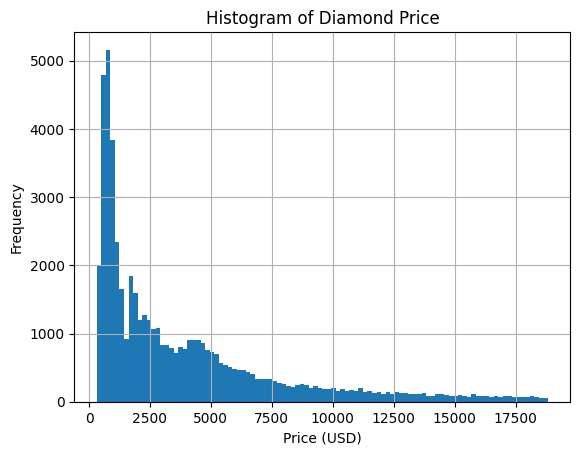

In [45]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
df.hist('price',bins = 100)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Price')

- In a similar vein, we have **boxplots** which are simplications of historgrams:

Text(0.5, 1.0, 'Prices of Diamonds')

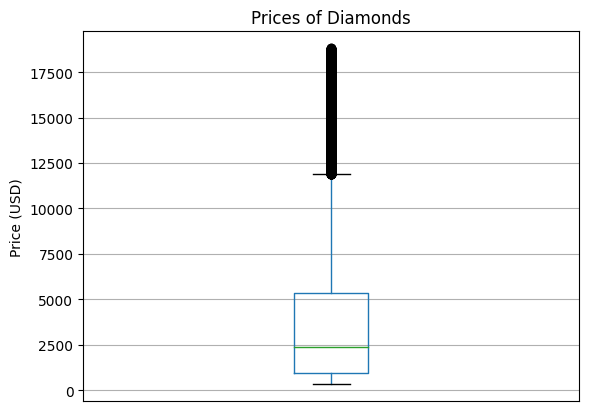

In [46]:
df.boxplot('price')
plt.xticks([])
plt.ylabel('Price (USD)')
plt.title('Prices of Diamonds')

## Two (or more) Variables
- If we have a time series, we may then use **line plots**.
- For example:

Text(0.5, 1.0, 'US S&P 500 Index Stock Price')

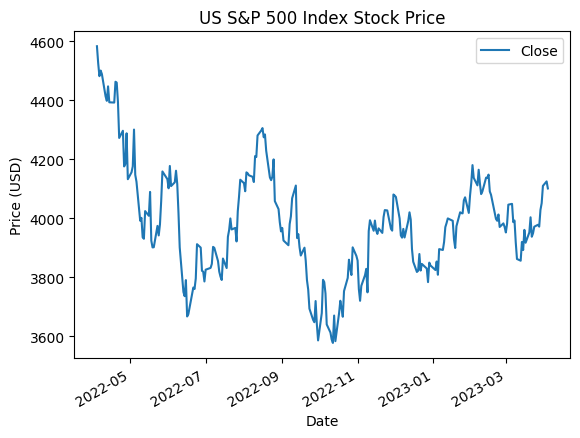

In [47]:
time_df = pd.read_csv('US_S&P.csv')
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df.replace(',', '', regex = True, inplace = True)
time_df[['Open', 'High', 'Low', 'Close']] = time_df[['Open', 'High', 'Low', 'Close']].apply(pd.to_numeric, axis = 1)
time_df.plot(x = 'Date', y = 'Close')
plt.ylabel('Price (USD)')
plt.title('US S&P 500 Index Stock Price')

- Another option here is **scatter plots**:

Text(0.5, 1.0, 'Price per Carat')

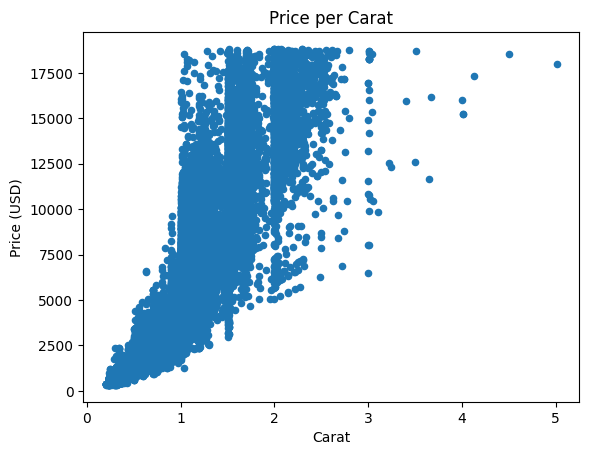

In [48]:
df.plot.scatter(x = 'carat', y = 'price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.title('Price per Carat')

- Notice here that the data points create a giant blob. To remedy this, let's decrease the size.

Text(0.5, 1.0, 'Price per Carat')

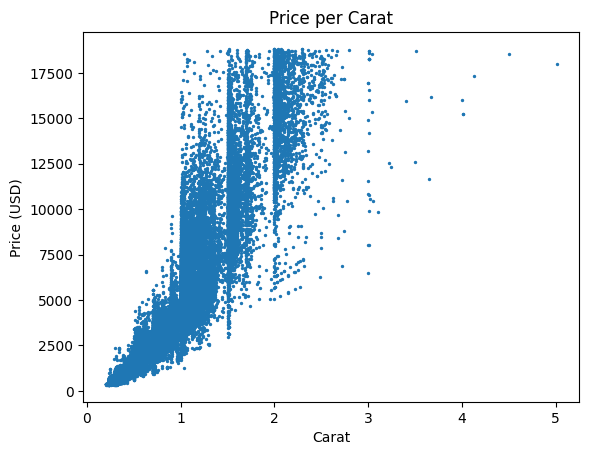

In [95]:
df.plot.scatter(x = 'carat', y = 'price', s = 2)
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.title('Price per Carat')

- Now while this is an improvement, there is still too many data points to really study the behavior of our data. This is where the Seaborn library shows its strengths!

## Seaborn

In [105]:
# Import seaborn packcage
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


[Text(0.5, 1.0, 'Number of Passengers per Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Passengers')]

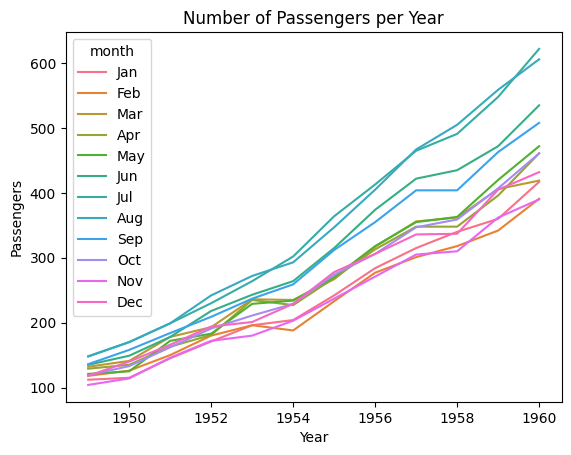

In [67]:
sns.lineplot(data = flights, x = 'year', y = 'passengers', hue = 'month').set(title = 'Number of Passengers per Year', 
                                                                              xlabel = 'Year',
                                                                              ylabel = 'Passengers')

[Text(0.5, 1.0, 'Number of Passengers per Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Passengers')]

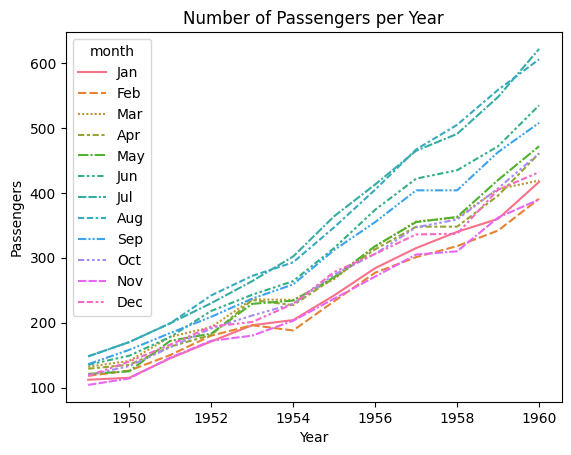

In [68]:
sns.lineplot(data = flights, x = 'year', y = 'passengers', hue = 'month', style = 'month').set(title = 'Number of Passengers per Year', 
                                                                                               xlabel = 'Year',
                                                                                               ylabel = 'Passengers')

[Text(0.5, 1.0, 'Number of Passengers per Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Passengers')]

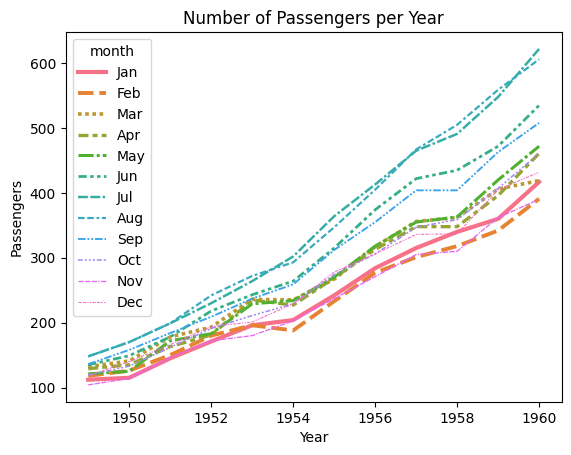

In [71]:
sns.lineplot(data = flights, x = 'year', y = 'passengers', hue = 'month', style = 'month', size = 'month').set(title = 'Number of Passengers per Year', 
                                                                                                               xlabel = 'Year',
                                                                                                               ylabel = 'Passengers')

[Text(0.5, 1.0, 'Price per Carat'),
 Text(0.5, 0, 'Carat'),
 Text(0, 0.5, 'Price (USD)')]

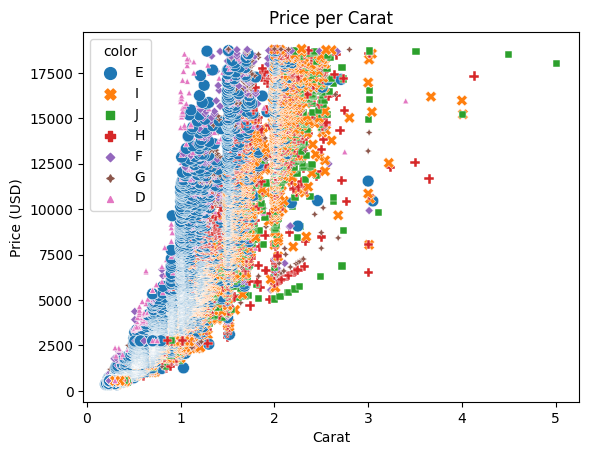

In [72]:
sns.scatterplot(data = df, x = 'carat', y = 'price', hue = 'color', style = 'color', size = 'color').set(title = 'Price per Carat', 
                                                                                                         xlabel = 'Carat',
                                                                                                         ylabel = 'Price (USD)')

Text(0.5, 0.98, 'Price per Carat')

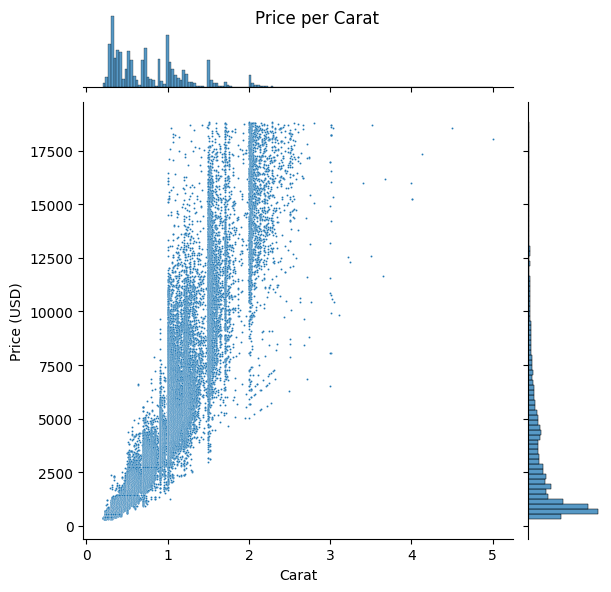

In [108]:
# Shows marignal histographs with a scatter plot
sns.jointplot(data = df, x = 'carat', y = 'price', s = 2)
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.suptitle('Price per Carat')

Text(0.5, 0.98, 'Price per Carat')

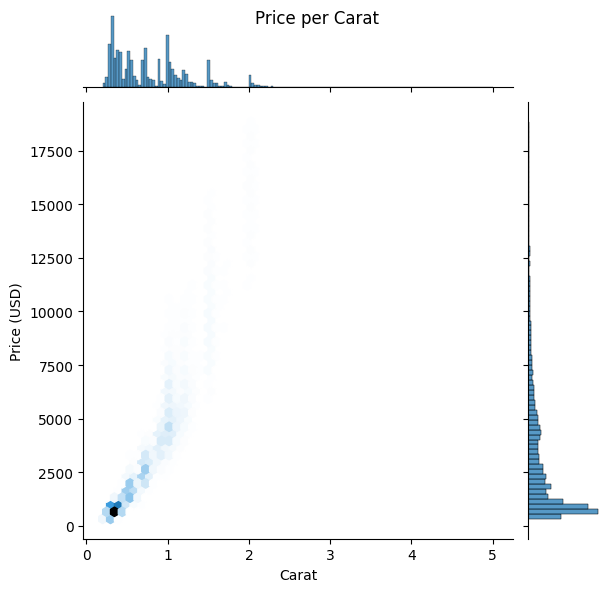

In [56]:
# Shows marignal histographs with a bivariate histogram using hexagonal bins
sns.jointplot(data = df, x = 'carat', y = 'price', kind = 'hex')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.suptitle('Price per Carat')

Text(0.5, 0.98, 'Price per Carat')

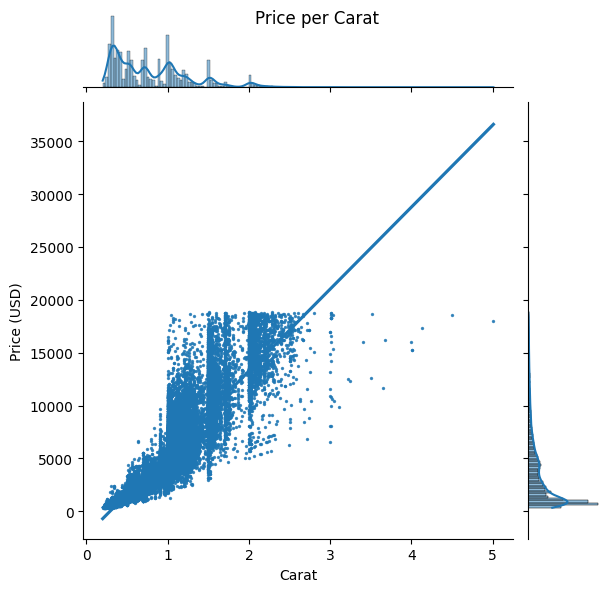

In [57]:
# Plots a scatter plot and marginal histograms with a linear regression
sns.jointplot(data = df, x = 'carat', y = 'price', kind = 'reg', scatter_kws={'s': 2})
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.suptitle('Price per Carat')

Text(0.5, 0.98, 'Price per Carat')

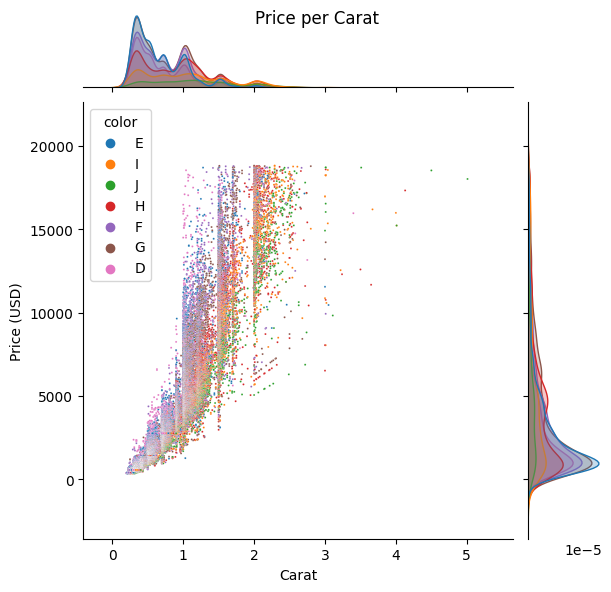

In [102]:
sns.jointplot(data = df, x = 'carat', y = 'price', hue = 'color', s = 2)
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.suptitle('Price per Carat')

Text(0.5, 1.0, 'Price per Color')

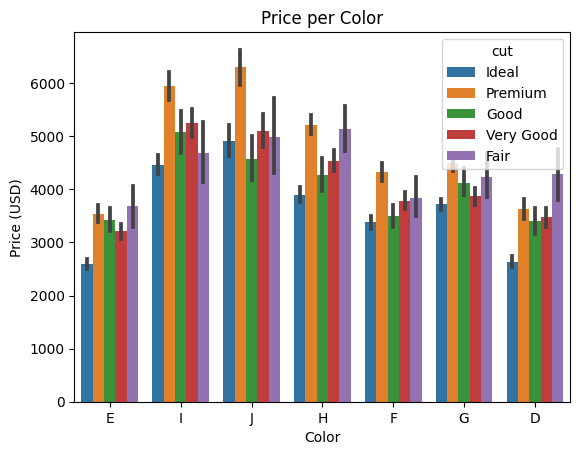

In [99]:
# Shows multiple barplots
sns.barplot(data = df, x = 'color', y = 'price', hue = 'cut')
plt.xlabel('Color')
plt.ylabel('Price (USD)')
plt.title('Price per Color')

Text(0.5, 1.0, 'Price per Color')

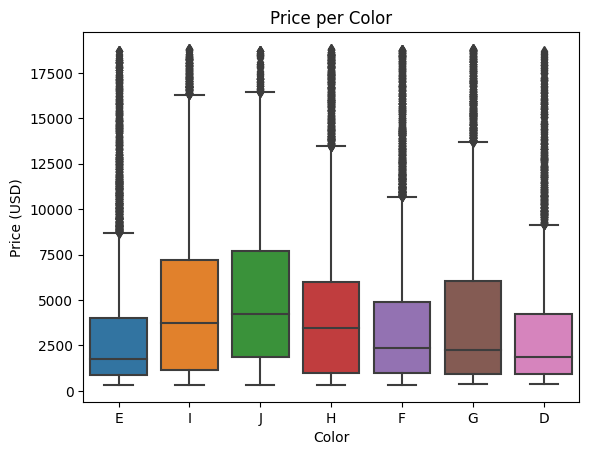

In [101]:
# Shows multiple boxplots
sns.boxplot(data = df, x = 'color', y = 'price')
plt.xlabel('Color')
plt.ylabel('Price (USD)')
plt.title('Price per Color')

Text(0.5, 1.0, 'Price per Color')

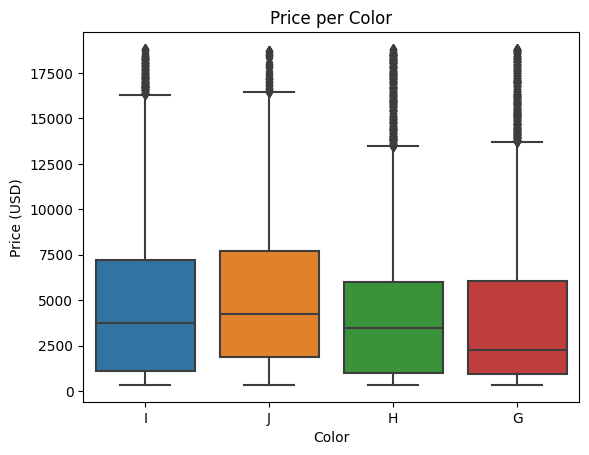

In [61]:
# Shows the boxplots for only J, I, H, G
sns.boxplot(data = df.loc[df['color'].isin(['J','I','H','G'])], x = 'color', y = 'price')
plt.xlabel('Color')
plt.ylabel('Price (USD)')
plt.title('Price per Color')

Text(0.5, 1.0, 'Histogram of Diamond Price')

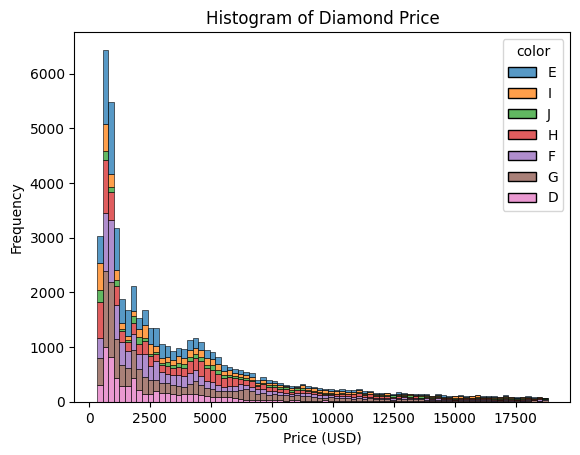

In [63]:
sns.histplot(data = df, x = 'price', hue = 'color', multiple = 'stack')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Price')

## Creating Panels

Text(0.5, 0.98, 'Price per Color')

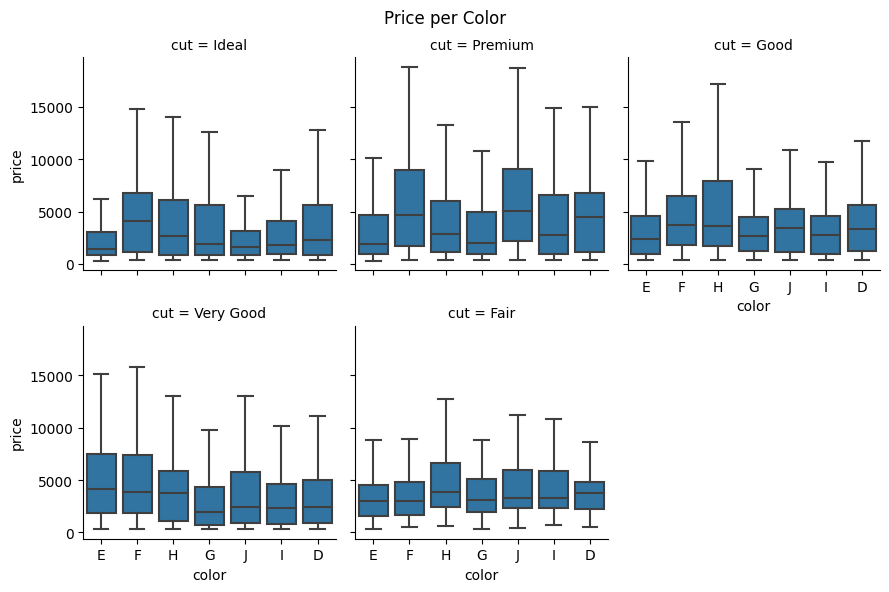

In [91]:
g = sns.FacetGrid(data = df, col = 'cut', col_wrap = 3, height = 3)
g.map(sns.boxplot, 'color', 'price', showfliers = False)
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Price per Color')

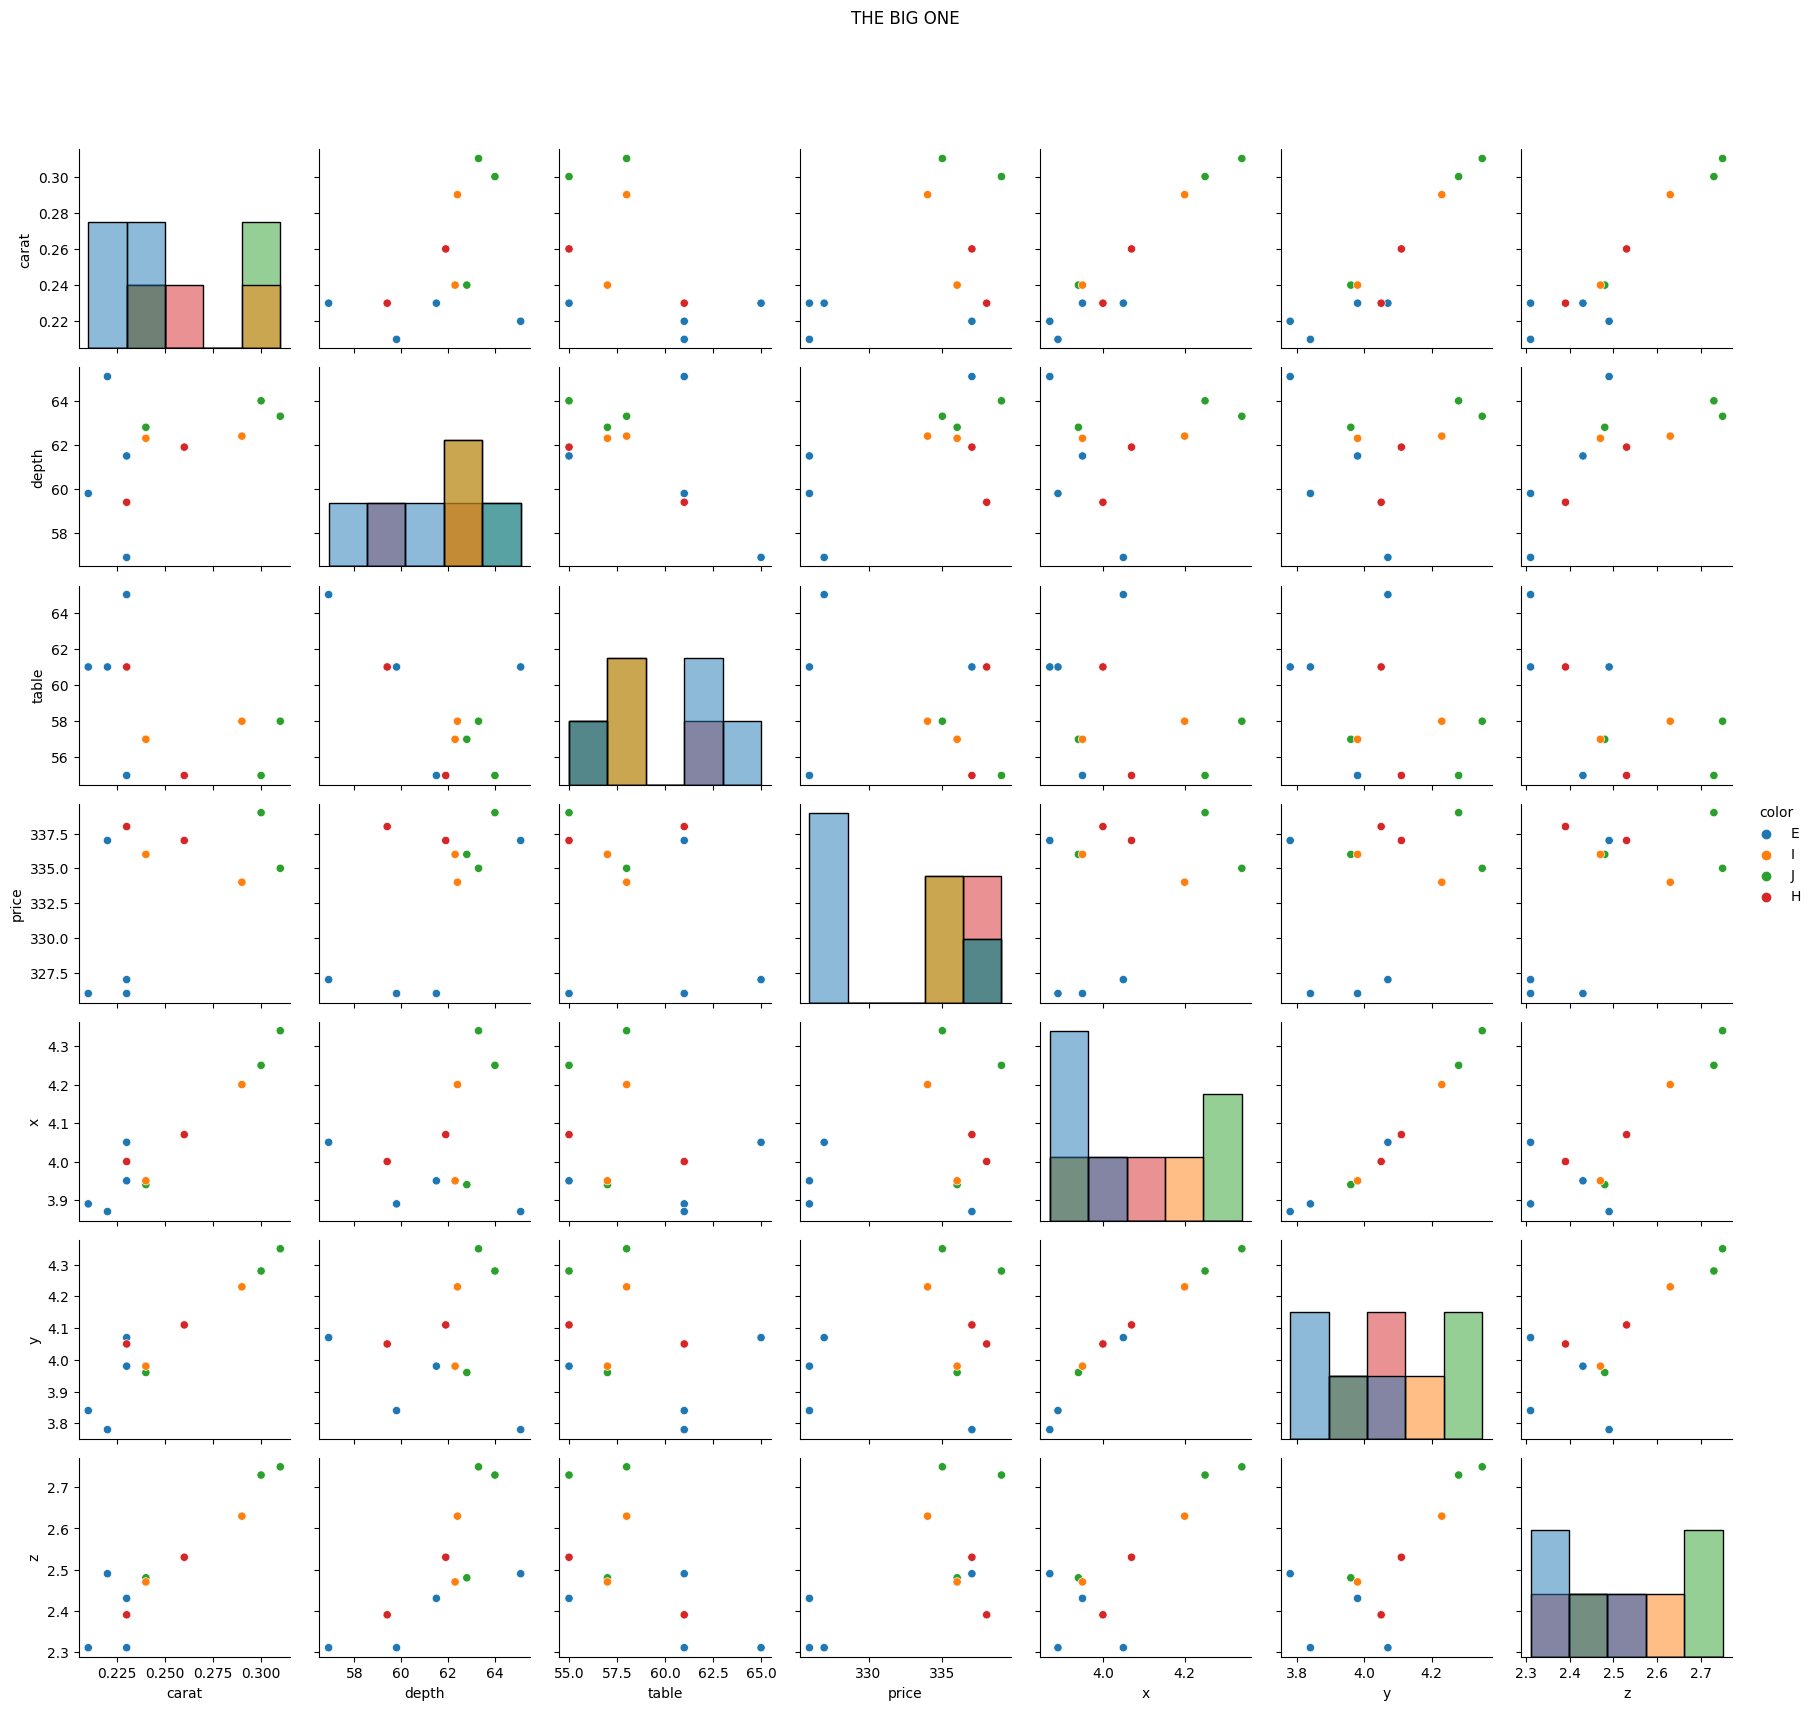

In [93]:
g = sns.PairGrid(data = df.loc[0:50], hue = 'color') # only first 50 rows because of render time
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('THE BIG ONE')
g.add_legend()

## General Tips
![](chartChooser.jpg)

## Scikitlearn
- Finally, to get you guys thinking about statistics, let's go over some basic statistical analysis we can do using Data Frames: (all attributes listed are from the `scipy` python package.)
    - test